# 라이브러리 및 데이터 불러오기

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
from sklearn.preprocessing import RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore')

In [184]:
train_tmp=pd.read_csv('train.csv').set_index('id')
test_tmp=pd.read_csv('test.csv').set_index('id')

# 데이터 및 결측치 확인

## 결측치

In [185]:
train_tmp

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,,,,,,,,,,,,,,
1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1347,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1348,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000


In [186]:
train_tmp.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [187]:
test_tmp

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
id,,,,,,,,,,,,,
1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920


In [188]:
test_tmp.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
dtype: int64

## 데이터 구성 및 타입에 따른 칼럼 분류

In [189]:
train_tmp['Exter Qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [190]:
train_tmp.dtypes

Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

In [191]:
num_feat=train_tmp.keys()[(train_tmp.dtypes=='int64')|(train_tmp.dtypes=='float64')]
obj_feat=train_tmp.keys()[train_tmp.dtypes=='object']

In [192]:
print(num_feat)
print(obj_feat)

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt', 'target'],
      dtype='object')
Index(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual'], dtype='object')


In [193]:
train_tmp.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


# EDA 및 시각화

## 수치형 데이터 분포 확인

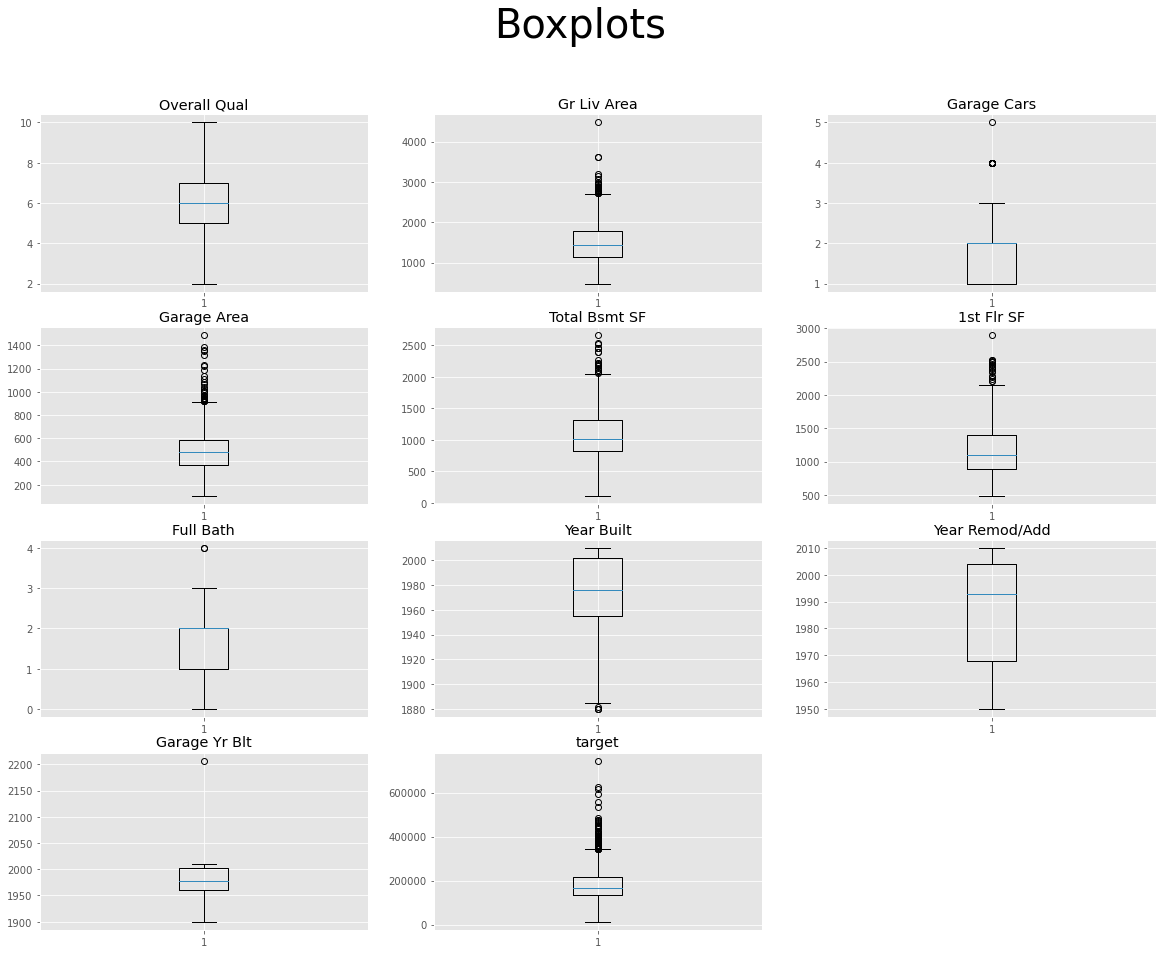

In [194]:
# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(num_feat)):
    plt.subplot(4,3,i+1) # 수치형 데이터가 11개이므로 4*3=12개 자리가 필요합니다.
    plt.title(num_feat[i])
    plt.boxplot(train_tmp[num_feat[i]])
plt.show()

## 오브젝트 칼럼 분포 확인

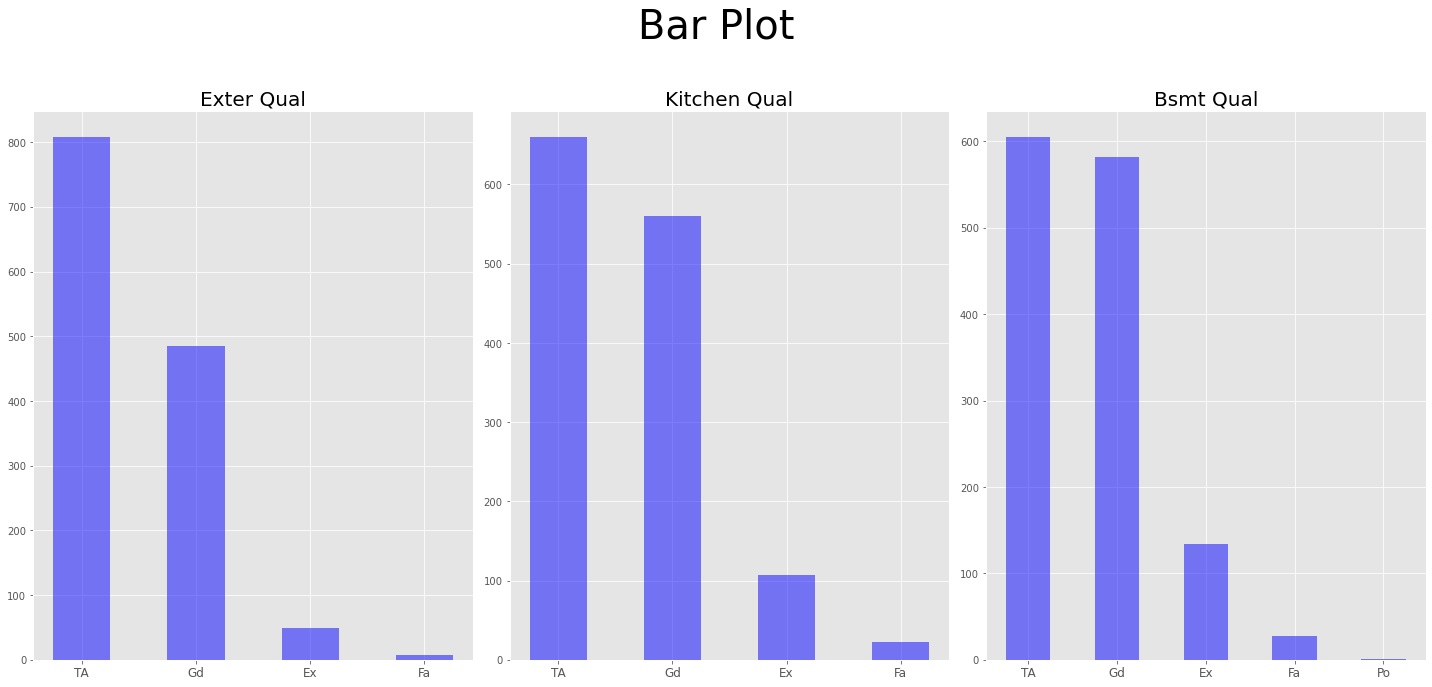

In [195]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(obj_feat)):
    plt.subplot(1,3,i+1)
    plt.title(obj_feat[i], fontsize=20)
    temp = train_tmp[obj_feat[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### target과 오브젝트 칼럼 간 관계 확인

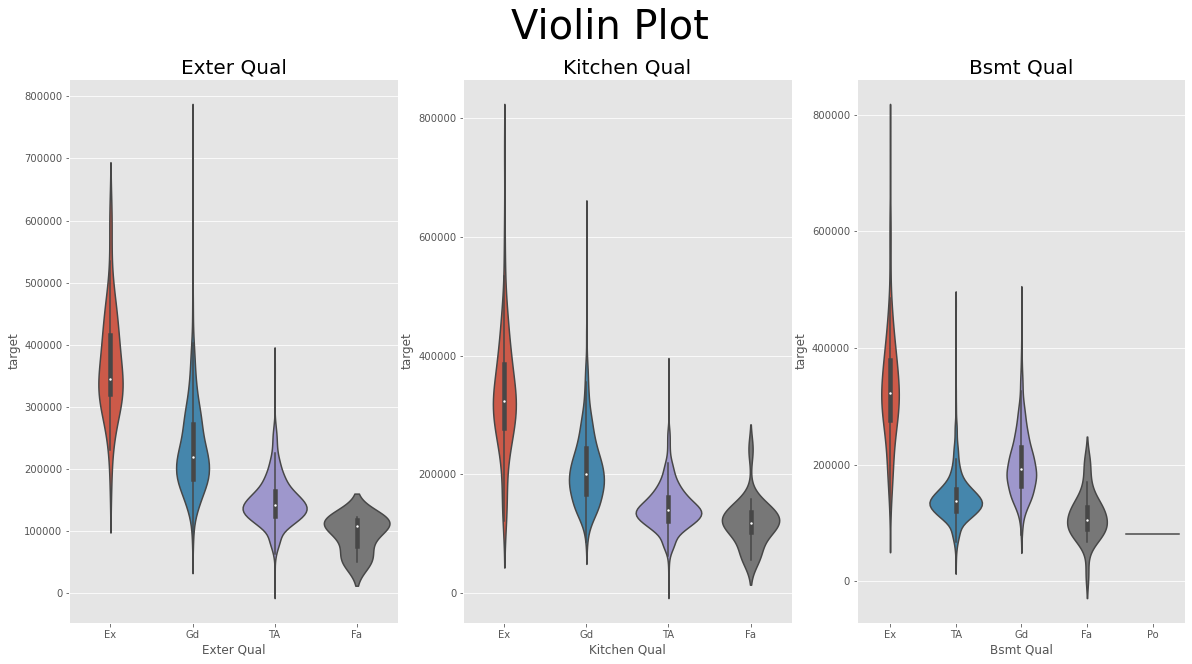

In [196]:
plt.figure(figsize=(20,10))
plt.suptitle('Violin Plot',fontsize=40)
for i in range(len(obj_feat)):
    plt.subplot(1,3,i+1)
    plt.title(obj_feat[i],fontsize=20)
    plt.xlabel(obj_feat[i])
    plt.ylabel('target')
    sns.violinplot(x=train_tmp[obj_feat[i]],y=train_tmp['target'],ci=None)
plt.show()

### Overall Qual 과 오브젝트 칼럼 간 관계 확인

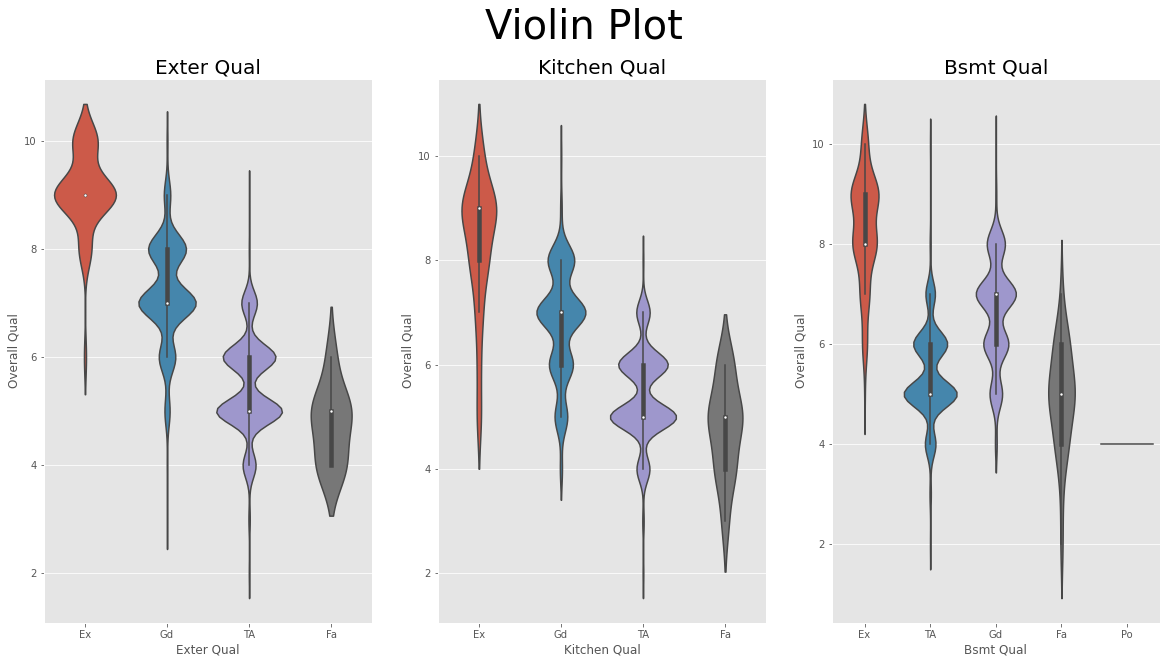

In [197]:
plt.figure(figsize=(20,10))
plt.suptitle('Violin Plot',fontsize=40)
for i in range(len(obj_feat)):
    plt.subplot(1,3,i+1)
    plt.title(obj_feat[i],fontsize=20)
    sns.violinplot(x=train_tmp[obj_feat[i]],y=train_tmp['Overall Qual'],ci=None)
plt.show()

# 데이터 전처리

## 모든 칼럼의 수치화

In [198]:
def preprocessing(train_df:pd.DataFrame,test_df:pd.DataFrame)->list:
    train_df=train_df.copy()
    test_df=test_df.copy()
    result=[train_df['target']]
    train_df.drop(columns=['target'],axis=1,inplace=True)
    for i,df in enumerate([train_df,test_df]):
        df.reset_index(inplace=True)
        df['Exter Qual']=df['Exter Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':1})
        df['Kitchen Qual']=df['Kitchen Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':1})
        df['Bsmt Qual']=df['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':1})
        df['Year Built']=df['Year Built'].apply(lambda x: 2022-x)
        df['Year Remod/Add']=df['Year Remod/Add'].apply(lambda x: 2022-x)
        df['Garage Yr Blt']=df['Garage Yr Blt'].apply(lambda x: 2022-x)
        #df['is_Remod']=df['id'].apply(lambda x: 1 if df.loc[x-1,'Year Built']==df.loc[x-1,'Year Remod/Add'] else 0)
        #df=pd.get_dummies(df,columns=['Exter Qual','Kitchen Qual','Bsmt Qual'])
        result.append(df.set_index('id'))
    return result
    

In [199]:
y_train,x_train,x_test=preprocessing(train_tmp,test_tmp)

In [200]:
x_train.columns

Index(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'],
      dtype='object')

In [201]:
x_test.columns

Index(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'],
      dtype='object')

In [202]:
x_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
id,,,,,,,,,,,,,
1,10,2392,4,3,968,4,2392,2392,4,2,19,19,19
2,7,1352,3,2,466,3,1352,1352,4,2,16,15,16
3,5,900,2,1,288,2,864,900,2,1,55,55,55
4,5,1174,2,2,576,3,680,680,2,1,122,16,22
5,7,1958,3,3,936,3,1026,1026,3,2,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,6,1756,3,2,422,2,872,888,4,2,26,25,26
1347,9,2748,3,3,850,4,1850,1850,4,2,16,16,16
1348,5,1214,2,1,318,2,1214,1214,2,2,55,55,55


In [203]:
#plt.figure(figsize=(20,10))
#sns.violinplot(x=x_train['is_Remod'],y=y_train)

## 회귀 분석을 위한 정규화 과정

In [204]:
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## 앙상블 모델 구성을 위한 KFold cross validation

In [205]:
from sklearn.model_selection import KFold

In [206]:
cv=KFold(
    n_splits=3,
    shuffle=True,
    random_state=25
)

# 모델링

## 모델 평가를 위한 대회 배포 평가 함수 입력

In [207]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

## 단순 선형 회귀, 랜덤포레스트 회귀 모형 이용

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [209]:
y_train=np.array(y_train.reset_index().drop({'id'},axis=1))

## 3 Fold cv를 이용한 3개의 모델 생성 및 학습

In [210]:
models=[]
scores=[]
for train_idx,val_idx in cv.split(x_train,y_train):
    print('='*60)
    model=RandomForestRegressor(random_state=25,verbose=1)
    model.fit(x_train[train_idx],y_train[train_idx])
    
    models.append(model)
    scores.append(NMAE(y_train[val_idx],model.predict(x_train[val_idx])))
print(scores)
print(np.mean(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.4225580924043811, 0.42297073415277064, 0.3997674026595462]
0.4150987430722326


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


# 예측

## K개의 예측 결과를 리스트에 저장

In [211]:
pred_list=[]
for model in models:
    pred_list.append(model.predict(x_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


## K개의 예측 결과를 평균 내어 하나의 예측 결과 생성

In [212]:
preds=np.mean(pred_list,axis=0)

## 예측 결과 입력

In [213]:
submission=pd.read_csv('sample_submission.csv')
submission['target']=preds
submission.to_csv('D:/Users/user/Desktop/submission.csv',index=False)